# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Data Processing

In [2]:
df = pd.read_csv("Dataset/results.csv", encoding = "ISO-8859-1")

df.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [4]:
# Dropping older seasons (2010-2011 and before)

df = df[df["Season"] >= "2010-2011"]

In [5]:
pd.set_option('display.max_columns', None)

df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
7004,2011-12,2011-08-13T00:00:00Z,Blackburn,Wolves,1,2,A,1.0,1.0,D,K Friend,16.0,13.0,8.0,4.0,12.0,6.0,14.0,10.0,4.0,2.0,0.0,0.0
7005,2011-12,2011-08-13T00:00:00Z,Fulham,Aston Villa,0,0,D,0.0,0.0,D,L Mason,13.0,7.0,9.0,1.0,2.0,3.0,10.0,18.0,2.0,4.0,0.0,0.0
7006,2011-12,2011-08-13T00:00:00Z,Liverpool,Sunderland,1,1,D,1.0,0.0,H,P Dowd,11.0,15.0,4.0,6.0,6.0,3.0,17.0,12.0,4.0,4.0,0.0,0.0
7007,2011-12,2011-08-13T00:00:00Z,Newcastle,Arsenal,0,0,D,0.0,0.0,D,P Walton,6.0,9.0,1.0,4.0,2.0,5.0,9.0,11.0,3.0,5.0,0.0,1.0
7008,2011-12,2011-08-13T00:00:00Z,QPR,Bolton,0,4,A,0.0,1.0,A,M Atkinson,13.0,13.0,7.0,7.0,3.0,2.0,9.0,16.0,1.0,2.0,1.0,0.0


In [6]:
# Checking if there is any missing value

df.isna().any()

Season      False
DateTime    False
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTHG        False
HTAG        False
HTR         False
Referee     False
HS          False
AS          False
HST         False
AST         False
HC          False
AC          False
HF          False
AF          False
HY          False
AY          False
HR          False
AR          False
dtype: bool

In [7]:
# Dropping columns that are not needed in the model

df = df.drop(["DateTime", "FTHG", "FTAG", "HTHG", "HTAG", "HTR"], axis=1)

df.head()

,Season,HomeTeam,AwayTeam,FTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
7004,2011-12,Blackburn,Wolves,A,K Friend,16.0,13.0,8.0,4.0,12.0,6.0,14.0,10.0,4.0,2.0,0.0,0.0
7005,2011-12,Fulham,Aston Villa,D,L Mason,13.0,7.0,9.0,1.0,2.0,3.0,10.0,18.0,2.0,4.0,0.0,0.0
7006,2011-12,Liverpool,Sunderland,D,P Dowd,11.0,15.0,4.0,6.0,6.0,3.0,17.0,12.0,4.0,4.0,0.0,0.0
7007,2011-12,Newcastle,Arsenal,D,P Walton,6.0,9.0,1.0,4.0,2.0,5.0,9.0,11.0,3.0,5.0,0.0,1.0
7008,2011-12,QPR,Bolton,A,M Atkinson,13.0,13.0,7.0,7.0,3.0,2.0,9.0,16.0,1.0,2.0,1.0,0.0


In [8]:
# Transforming the feature "Season" to a single year in order to make the models work properly

df["SeasonStartYear"] = df["Season"].str.extract(r'(\d{4})').astype(int)

df.drop(["Season"], axis=1, inplace=True)

In [9]:
# Adding dummy variables

df_dummies = pd.get_dummies(df, columns=["HomeTeam", "AwayTeam", "Referee"])

df_dummies

,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SeasonStartYear,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Blackburn,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brentford,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,HomeTeam_Hull,HomeTeam_Leeds,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Middlesbrough,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Reading,HomeTeam_Sheffield United,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wigan,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Blackburn,AwayTeam_Bolton,AwayTeam_Bournemouth,AwayTeam_Brentford,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Cardiff,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Huddersfield,AwayTeam_Hull,AwayTeam_Leeds,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Middlesbrough,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Reading,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,Referee_A Madley,Referee_A Marriner,Referee_A Moss,Referee_A Taylor,Referee_C Foy,Referee_C Kavanagh,Referee_C Pawson,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_H Webb,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_K Friend,Referee_K Stroud,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Clattenburg,Referee_M Dean,Referee_M Halsey,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Dowd,Referee_P Tierney,Referee_P Walton,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Harrington,Referee_T Robinson,Referee_l Mason
7004,A,16.0,13.0,8.0,4.0,12.0,6.0,14.0,10.0,4.0,2.0,0.0,0.0,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7005,D,13.0,7.0,9.0,1.0,2.0,3.0,10.0,18.0,2.0,4.0,0.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7006,D,11.0,15.0,4.0,6.0,6.0,3.0,17.0,12.0,4.0,4.0,0.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7007,D,6.0,9.0,1.0,4.0,2.0,5.0,9.0,11.0,3.0,5.0,0.0,1.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7008,A,13.0,13.0,7.0,7.0,3.0,2.0,9.0,16.0,1.0,2.0,1.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [10]:
# Encoding target variable

label_encoder = LabelEncoder()

df_dummies["FTR"] = label_encoder.fit_transform(df_dummies["FTR"])

In [11]:
df_dummies.head(10)

,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SeasonStartYear,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Blackburn,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brentford,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,HomeTeam_Hull,HomeTeam_Leeds,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Middlesbrough,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Reading,HomeTeam_Sheffield United,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wigan,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Blackburn,AwayTeam_Bolton,AwayTeam_Bournemouth,AwayTeam_Brentford,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Cardiff,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Huddersfield,AwayTeam_Hull,AwayTeam_Leeds,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Middlesbrough,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Reading,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,Referee_A Madley,Referee_A Marriner,Referee_A Moss,Referee_A Taylor,Referee_C Foy,Referee_C Kavanagh,Referee_C Pawson,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_H Webb,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_K Friend,Referee_K Stroud,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Clattenburg,Referee_M Dean,Referee_M Halsey,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Dowd,Referee_P Tierney,Referee_P Walton,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Harrington,Referee_T Robinson,Referee_l Mason
7004,0,16.0,13.0,8.0,4.0,12.0,6.0,14.0,10.0,4.0,2.0,0.0,0.0,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7005,1,13.0,7.0,9.0,1.0,2.0,3.0,10.0,18.0,2.0,4.0,0.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7006,1,11.0,15.0,4.0,6.0,6.0,3.0,17.0,12.0,4.0,4.0,0.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7007,1,6.0,9.0,1.0,4.0,2.0,5.0,9.0,11.0,3.0,5.0,0.0,1.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7008,0,13.0,13.0,7.0,7.0,3.0,2.0,9.0,16.0,1.0,2.0,1.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7009,1,18.0,13.0,11.0,3.0,7.0,3.0,11.0,8.0,2.0,2.0,0.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7010,1,6.0,20.0,3.0,11.0,4.0,6.0,12.0,12.0,2.0,2.0,0.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [12]:
# Splitting data into train and test 

X = df_dummies.drop(columns=["FTR"])
y = df_dummies["FTR"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_test.head()

,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SeasonStartYear,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Blackburn,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brentford,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,HomeTeam_Hull,HomeTeam_Leeds,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Middlesbrough,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Reading,HomeTeam_Sheffield United,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wigan,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Blackburn,AwayTeam_Bolton,AwayTeam_Bournemouth,AwayTeam_Brentford,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Cardiff,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Huddersfield,AwayTeam_Hull,AwayTeam_Leeds,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Middlesbrough,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Reading,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,Referee_A Madley,Referee_A Marriner,Referee_A Moss,Referee_A Taylor,Referee_C Foy,Referee_C Kavanagh,Referee_C Pawson,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_H Webb,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_K Friend,Referee_K Stroud,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Clattenburg,Referee_M Dean,Referee_M Halsey,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Dowd,Referee_P Tierney,Referee_P Walton,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Harrington,Referee_T Robinson,Referee_l Mason
8999,22.0,8.0,0.0,2.0,7.0,2.0,13.0,8.0,1.0,2.0,0.0,0.0,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10616,8.0,19.0,2.0,6.0,5.0,11.0,12.0,10.0,1.0,1.0,0.0,0.0,2020,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9729,6.0,12.0,1.0,5.0,5.0,9.0,11.0,5.0,0.0,0.0,0.0,0.0,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10065,6.0,23.0,5.0,8.0,1.0,8.0,9.0,9.0,1.0,1.0,0.0,0.0,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7684,9.0,10.0,4.0,6.0,3.0,6.0,11.0,9.0,3.0,1.0,0.0,0.0,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
y_test

8999     2
10616    1
9729     0
10065    0
7684     0
        ..
9038     2
10311    2
7258     2
10832    2
11078    2
Name: FTR, Length: 822, dtype: int64

In [16]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (3287, 125)
Shape of y_train:  (3287,)
Shape of X_test:  (822, 125)
Shape of y_test:  (822,)


# Running Models

### Random Forest

In [17]:
# Running the model

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred_rfc = rfc.predict(X_test)

In [19]:
# Analyzing the performance

print(classification_report(y_test, y_pred_rfc))


              precision    recall  f1-score   support

           0       0.63      0.65      0.64       277
           1       0.31      0.05      0.09       202
           2       0.57      0.83      0.67       343

    accuracy                           0.58       822
   macro avg       0.51      0.51      0.47       822
weighted avg       0.53      0.58      0.52       822



In [20]:
# Mapping encoded values for confusion matrix

target_names = ["A", "D", "H"]

class_mapping = {0: "A", 1: "D", 2: "H"}  

y_test_names = [class_mapping[val] for val in y_test]
y_pred_rfc_names = [class_mapping[val] for val in y_pred_rfc]

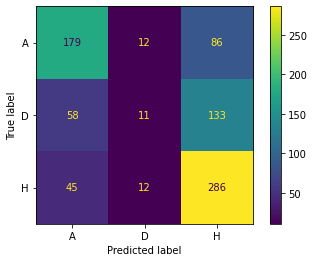

In [21]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=target_names)

disp_rfc.plot()

In [22]:
# Hyperparameter tuning for Random Forest

parameters_rfc = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=parameters_rfc, cv=5, scoring="accuracy")
grid_search_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [23]:
best_rfc_model = grid_search_rfc.best_estimator_
print("Best Hyperparameters:", grid_search_rfc.best_params_)


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [24]:
y_pred_rfc_grid = best_rfc_model.predict(X_test)

In [25]:
# Analyzing the performance of tuned model

print(classification_report(y_test, y_pred_rfc_grid))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       277
           1       0.27      0.02      0.04       202
           2       0.55      0.85      0.67       343

    accuracy                           0.57       822
   macro avg       0.49      0.50      0.45       822
weighted avg       0.51      0.57      0.50       822



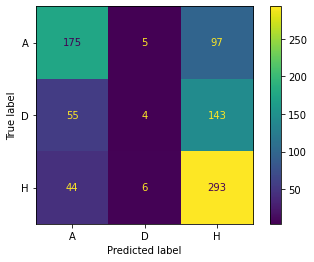

In [26]:
# Confusion matrix

y_pred_rfc_grid_names = [class_mapping[val] for val in y_pred_rfc_grid]

cm_rfc_grid = confusion_matrix(y_test, y_pred_rfc_grid)
disp_rfc_grid = ConfusionMatrixDisplay(confusion_matrix=cm_rfc_grid, display_labels=target_names)

disp_rfc_grid.plot()

### Bagging Classifier

In [27]:
# Running the model

bgc = BaggingClassifier()

bgc = bgc.fit(X_train,y_train)

y_pred_bgc = bgc.predict(X_test)

In [28]:
# Analyzing the performance

print(classification_report(y_test, y_pred_bgc))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       277
           1       0.37      0.21      0.26       202
           2       0.61      0.73      0.67       343

    accuracy                           0.57       822
   macro avg       0.52      0.52      0.51       822
weighted avg       0.54      0.57      0.55       822



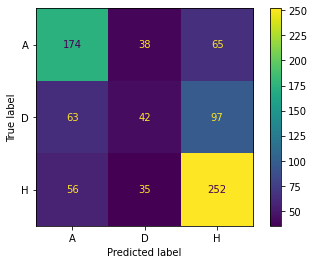

In [29]:
# Confusion Matrix

y_pred_bgc_names = [class_mapping[val] for val in y_pred_bgc]

cm_bgc = confusion_matrix(y_test, y_pred_bgc)
disp_bgc= ConfusionMatrixDisplay(confusion_matrix=cm_bgc, display_labels=target_names)

disp_bgc.plot()

In [30]:
# Hyperparameter tuning for Bagging Classifier

parameters_bgc = {"n_estimators": [50, 100, 200],  "max_samples": [0.5, 0.8, 1.0], "max_features": [0.5, 0.8, 1.0]}

grid_search_bgc = GridSearchCV(estimator=rfc, param_grid=parameters_bgc, cv=5, scoring="accuracy")
grid_search_bgc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [0.5, 0.8, 1.0],
                         'max_samples': [0.5, 0.8, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [31]:
best_bgc_model = grid_search_bgc.best_estimator_
print("Best Hyperparameters:", grid_search_bgc.best_params_)

Best Hyperparameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}


In [32]:
y_pred_bgc_grid = best_bgc_model.predict(X_test)

In [33]:
# Analyzing the performance of tuned model

print(classification_report(y_test, y_pred_bgc_grid))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       277
           1       0.41      0.10      0.17       202
           2       0.57      0.79      0.66       343

    accuracy                           0.58       822
   macro avg       0.53      0.52      0.49       822
weighted avg       0.55      0.58      0.53       822



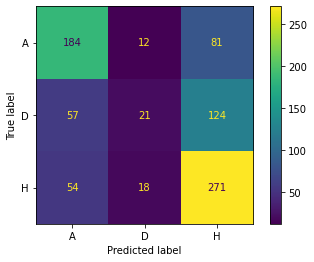

In [34]:
# Confusion Matrix

y_pred_bgc_grid_names = [class_mapping[val] for val in y_pred_bgc_grid]

cm_bgc_grid = confusion_matrix(y_test, y_pred_bgc_grid)
disp_bgc_grid= ConfusionMatrixDisplay(confusion_matrix=cm_bgc_grid, display_labels=target_names)

disp_bgc_grid.plot()

### XGBoost

In [35]:
# Running the model

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [36]:
# Analyzing the performance

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       277
           1       0.35      0.19      0.25       202
           2       0.61      0.77      0.68       343

    accuracy                           0.57       822
   macro avg       0.52      0.52      0.51       822
weighted avg       0.54      0.57      0.55       822



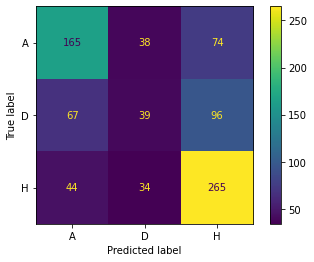

In [37]:
# Confusion Matrix

y_pred_xgb_names = [class_mapping[val] for val in y_pred_xgb]

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb= ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=target_names)

disp_xgb.plot()

In [38]:
# Hyperparameter tuning for XGBoost

parameters_xgb= {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7], "learning_rate": [0.01, 0.1, 0.5], "subsample": [0.5, 0.8, 1.0]}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=parameters_xgb, cv=5, scoring="accuracy", refit="accuracy", n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [39]:
best_xgb_model = grid_search_xgb.best_estimator_
print("Best Hyperparameters:", grid_search_xgb.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [40]:
y_pred_xgb_grid = best_xgb_model.predict(X_test)

In [41]:
# Analyzing the performance of tuned model

print(classification_report(y_test, y_pred_xgb_grid))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       277
           1       0.38      0.06      0.11       202
           2       0.58      0.83      0.68       343

    accuracy                           0.59       822
   macro avg       0.53      0.52      0.48       822
weighted avg       0.55      0.59      0.53       822



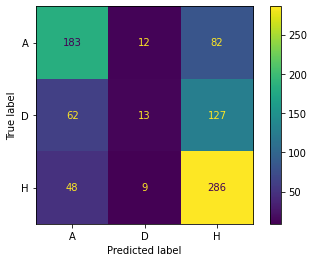

In [42]:
# Confusion Matrix

y_pred_xgb_grid_names = [class_mapping[val] for val in y_pred_xgb_grid]

cm_xgb_grid = confusion_matrix(y_test, y_pred_xgb_grid)
disp_xgb_grid= ConfusionMatrixDisplay(confusion_matrix=cm_xgb_grid, display_labels=target_names)

disp_xgb_grid.plot()

In [43]:
# Observing most impactful features on the best performed model

feature_importance = best_xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [44]:
top_n = 5  
print("Top", top_n, "features:")
print(feature_importance_df.head(top_n))


Top 5 features:
                Feature  Importance
2                   HST    0.040147
3                   AST    0.040083
68  AwayTeam_Man United    0.018889
31    HomeTeam_Man City    0.017134
10                   HR    0.016309


## Trying the model in a more realistic scenario

In [45]:
# Dropping result determining features like shots, fouls and cards from the dataset to observe a more realistic performance

df_dummies.head()

,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SeasonStartYear,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Blackburn,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brentford,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,HomeTeam_Hull,HomeTeam_Leeds,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Middlesbrough,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Reading,HomeTeam_Sheffield United,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wigan,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Blackburn,AwayTeam_Bolton,AwayTeam_Bournemouth,AwayTeam_Brentford,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Cardiff,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Huddersfield,AwayTeam_Hull,AwayTeam_Leeds,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Middlesbrough,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Reading,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,Referee_A Madley,Referee_A Marriner,Referee_A Moss,Referee_A Taylor,Referee_C Foy,Referee_C Kavanagh,Referee_C Pawson,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_H Webb,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_K Friend,Referee_K Stroud,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Clattenburg,Referee_M Dean,Referee_M Halsey,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Dowd,Referee_P Tierney,Referee_P Walton,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Harrington,Referee_T Robinson,Referee_l Mason
7004,0,16.0,13.0,8.0,4.0,12.0,6.0,14.0,10.0,4.0,2.0,0.0,0.0,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7005,1,13.0,7.0,9.0,1.0,2.0,3.0,10.0,18.0,2.0,4.0,0.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7006,1,11.0,15.0,4.0,6.0,6.0,3.0,17.0,12.0,4.0,4.0,0.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7007,1,6.0,9.0,1.0,4.0,2.0,5.0,9.0,11.0,3.0,5.0,0.0,1.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7008,0,13.0,13.0,7.0,7.0,3.0,2.0,9.0,16.0,1.0,2.0,1.0,0.0,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
New_X = df_dummies.drop(columns=["FTR", "HS", "AS", "HST", "AST", "HC", "AC", "HF", "AF", "HY", "AY", "HR", "AR"])
New_y = df_dummies["FTR"]

In [47]:
New_X.head()

,SeasonStartYear,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Blackburn,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brentford,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,HomeTeam_Hull,HomeTeam_Leeds,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Middlesbrough,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Reading,HomeTeam_Sheffield United,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wigan,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Blackburn,AwayTeam_Bolton,AwayTeam_Bournemouth,AwayTeam_Brentford,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Cardiff,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Huddersfield,AwayTeam_Hull,AwayTeam_Leeds,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Middlesbrough,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Reading,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,Referee_A Madley,Referee_A Marriner,Referee_A Moss,Referee_A Taylor,Referee_C Foy,Referee_C Kavanagh,Referee_C Pawson,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_H Webb,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_K Friend,Referee_K Stroud,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Clattenburg,Referee_M Dean,Referee_M Halsey,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Dowd,Referee_P Tierney,Referee_P Walton,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Harrington,Referee_T Robinson,Referee_l Mason
7004,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7005,2011,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7006,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7007,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7008,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(New_X, New_y, test_size=0.2, random_state=42)

In [49]:
X_test.head()

,SeasonStartYear,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Blackburn,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brentford,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,HomeTeam_Hull,HomeTeam_Leeds,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Middlesbrough,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Reading,HomeTeam_Sheffield United,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wigan,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Blackburn,AwayTeam_Bolton,AwayTeam_Bournemouth,AwayTeam_Brentford,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Cardiff,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Huddersfield,AwayTeam_Hull,AwayTeam_Leeds,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Middlesbrough,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Reading,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,Referee_A Madley,Referee_A Marriner,Referee_A Moss,Referee_A Taylor,Referee_C Foy,Referee_C Kavanagh,Referee_C Pawson,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_H Webb,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_K Friend,Referee_K Stroud,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Clattenburg,Referee_M Dean,Referee_M Halsey,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Dowd,Referee_P Tierney,Referee_P Walton,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Harrington,Referee_T Robinson,Referee_l Mason
8999,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10616,2020,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9729,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10065,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7684,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (3287, 113)
Shape of y_train:  (3287,)
Shape of X_test:  (822, 113)
Shape of y_test:  (822,)


In [51]:
# Running best performed model in new dataset

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=parameters_xgb, cv=5, scoring="accuracy", refit="accuracy", n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [52]:
best_xgb_model = grid_search_xgb.best_estimator_
print("Best Hyperparameters:", grid_search_xgb.best_params_)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}


In [53]:
y_pred_xgb_grid = best_xgb_model.predict(X_test)

In [54]:
# Analyzing the performance of tuned model

print(classification_report(y_test, y_pred_xgb_grid))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50       277
           1       0.22      0.01      0.02       202
           2       0.49      0.91      0.64       343

    accuracy                           0.52       822
   macro avg       0.45      0.44      0.39       822
weighted avg       0.48      0.52      0.44       822



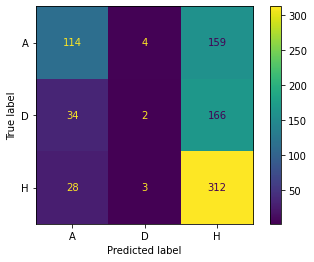

In [55]:
# Confusion Matrix

y_pred_xgb_grid_names = [class_mapping[val] for val in y_pred_xgb_grid]

cm_xgb_grid = confusion_matrix(y_test, y_pred_xgb_grid)
disp_xgb_grid= ConfusionMatrixDisplay(confusion_matrix=cm_xgb_grid, display_labels=target_names)

disp_xgb_grid.plot()

## Adding new features to the new dataset to improve the performance 

In [56]:
# Checking the structure of the dataset before applying dummy variables

df.tail()

,HomeTeam,AwayTeam,FTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SeasonStartYear
11108,Aston Villa,Tottenham,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,2021
11109,Brentford,West Ham,H,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,2021
11110,Leicester,Crystal Palace,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,2021
11111,Norwich,Burnley,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,2021
11112,Man City,Liverpool,D,A Taylor,11.0,6.0,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0,2021


In [57]:
# Introducing a new feature that shows win percentage of the teams in their last 5 matches

label_encoder = LabelEncoder()

category_mapping = {"H": 0, "A": 1, "D": 0.5}
df["FTR_encoded"] = df["FTR"].map(category_mapping)

In [58]:
time_window = 5

df["HomeWin"] = (df["FTR_encoded"] == 0).astype(int)
df["AwayWin"] = (df["FTR_encoded"] == 1).astype(int)

df["HomeWinPercentage"] = df.groupby("HomeTeam")["HomeWin"].rolling(time_window).mean().reset_index(level=0, drop=True)
df["AwayWinPercentage"] = df.groupby("AwayTeam")["AwayWin"].rolling(time_window).mean().reset_index(level=0, drop=True)

df = df.drop(["HomeWin", "AwayWin"], axis=1)

In [59]:
df.tail()

,HomeTeam,AwayTeam,FTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SeasonStartYear,FTR_encoded,HomeWinPercentage,AwayWinPercentage
11108,Aston Villa,Tottenham,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,2021,1.0,0.2,0.6
11109,Brentford,West Ham,H,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,2021,0.0,0.4,0.0
11110,Leicester,Crystal Palace,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,2021,0.0,0.6,0.4
11111,Norwich,Burnley,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,2021,0.0,0.2,0.2
11112,Man City,Liverpool,D,A Taylor,11.0,6.0,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0,2021,0.5,0.6,0.8


In [60]:
# Introducing a new feature that shows head-to-head results between two teams playing

category_mapping = {"H": 0, "A": 1, "D": 0.5}
df["FTR_encoded"] = df["FTR"].map(category_mapping)

df["FTR_encoded"] = df["FTR_encoded"].fillna(df["FTR"].apply(lambda x: label_encoder.fit_transform([x])[0]))

df['HomeWin'] = (df['FTR_encoded'] == 0).astype(int)
df['AwayWin'] = (df['FTR_encoded'] == 1).astype(int)

In [61]:
df["HomeWinPercentageVsAway"] = df.groupby(["HomeTeam", "AwayTeam"])["HomeWin"].cumsum() / df.groupby(["HomeTeam", "AwayTeam"]).cumcount()

df["HomeWinPercentageVsAway"] = df.groupby(["HomeTeam", "AwayTeam"])["HomeWinPercentageVsAway"].shift(1)

df = df.reset_index(drop=True)

df.loc[:, "HomeWinPercentageVsAway"] = df["HomeWinPercentageVsAway"]

df = df.drop(["FTR_encoded", "HomeWin", "AwayWin"], axis=1)

In [62]:
df.tail(10)

,HomeTeam,AwayTeam,FTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SeasonStartYear,HomeWinPercentage,AwayWinPercentage,HomeWinPercentageVsAway
4099,Newcastle,Wolves,H,P Bankes,12.0,5.0,4.0,2.0,1.0,2.0,6.0,13.0,1.0,1.0,0.0,0.0,2021,0.8,0.4,0.000000
4100,Everton,Man United,H,J Moss,7.0,12.0,3.0,4.0,5.0,7.0,4.0,10.0,2.0,2.0,0.0,0.0,2021,0.6,0.4,0.444444
4101,Arsenal,Brighton,A,D Coote,20.0,8.0,4.0,3.0,11.0,2.0,12.0,19.0,3.0,4.0,0.0,0.0,2021,0.6,0.4,0.666667
4102,Southampton,Chelsea,A,K Friend,4.0,24.0,1.0,14.0,3.0,3.0,11.0,10.0,1.0,0.0,0.0,0.0,2021,0.4,0.8,0.125000
4103,Watford,Leeds,A,A Marriner,8.0,10.0,1.0,5.0,3.0,8.0,8.0,12.0,2.0,0.0,0.0,0.0,2021,0.0,0.4,NaN
4104,Aston Villa,Tottenham,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,2021,0.2,0.6,0.000000
4105,Brentford,West Ham,H,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,2021,0.4,0.0,NaN
4106,Leicester,Crystal Palace,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,2021,0.6,0.4,0.666667
4107,Norwich,Burnley,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,2021,0.2,0.2,NaN
4108,Man City,Liverpool,D,A Taylor,11.0,6.0,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0,2021,0.6,0.8,0.666667


In [63]:
df.isna().sum()

HomeTeam                      0
AwayTeam                      0
FTR                           0
Referee                       0
HS                            0
AS                            0
HST                           0
AST                           0
HC                            0
AC                            0
HF                            0
AF                            0
HY                            0
AY                            0
HR                            0
AR                            0
SeasonStartYear               0
HomeWinPercentage           144
AwayWinPercentage           144
HomeWinPercentageVsAway    1439
dtype: int64

In [64]:
# Dropping NaN values

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df = df.dropna()

In [65]:
df.isna().sum()

HomeTeam                   0
AwayTeam                   0
FTR                        0
Referee                    0
HS                         0
AS                         0
HST                        0
AST                        0
HC                         0
AC                         0
HF                         0
AF                         0
HY                         0
AY                         0
HR                         0
AR                         0
SeasonStartYear            0
HomeWinPercentage          0
AwayWinPercentage          0
HomeWinPercentageVsAway    0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320 entries, 760 to 4108
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HomeTeam                 2320 non-null   object 
 1   AwayTeam                 2320 non-null   object 
 2   FTR                      2320 non-null   object 
 3   Referee                  2320 non-null   object 
 4   HS                       2320 non-null   float64
 5   AS                       2320 non-null   float64
 6   HST                      2320 non-null   float64
 7   AST                      2320 non-null   float64
 8   HC                       2320 non-null   float64
 9   AC                       2320 non-null   float64
 10  HF                       2320 non-null   float64
 11  AF                       2320 non-null   float64
 12  HY                       2320 non-null   float64
 13  AY                       2320 non-null   float64
 14  HR                    

In [67]:
# Adding dummy variables and encoding "FTR" value again

df_dummies = pd.get_dummies(df, columns=["HomeTeam", "AwayTeam", "Referee"])

df_dummies

,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SeasonStartYear,HomeWinPercentage,AwayWinPercentage,HomeWinPercentageVsAway,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Hull,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Bournemouth,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Hull,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wolves,Referee_A Madley,Referee_A Marriner,Referee_A Taylor,Referee_C Foy,Referee_C Kavanagh,Referee_C Pawson,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_H Webb,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_K Friend,Referee_K Stroud,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Clattenburg,Referee_M Dean,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Dowd,Referee_P Tierney,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Harrington,Referee_T Robinson
760,A,16.0,9.0,4.0,4.0,4.0,3.0,15.0,18.0,4.0,5.0,1.0,0.0,2013,0.4,0.6,2.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
761,H,26.0,10.0,11.0,4.0,12.0,6.0,11.0,11.0,1.0,1.0,0.0,0.0,2013,0.4,0.2,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
762,D,8.0,19.0,2.0,6.0,6.0,8.0,13.0,10.0,2.0,0.0,0.0,0.0,2013,0.4,0.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
763,A,20.0,5.0,3.0,1.0,6.0,1.0,14.0,14.0,0.0,3.0,0.0,0.0,2013,0.2,0.4,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
764,A,17.0,15.0,6.0,7.0,7.0,4.0,13.0,10.0,1.0,3.0,0.0,0.0,2013,0.0,0.4,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,A,20.0,8.0,4.0,3.0,11.0,2.0,12.0,19.0,3.0,4.0,0.0,0.0,2021,0.6,0.4,0.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4102,A,4.0,24.0,1.0,14.0,3.0,3.0,11.0,10.0,1.0,0.0,0.0,0.0,2021,0.4,0.8,0.125000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4104,A,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,2021,0.2,0.6,0.000000,0,1,0,0,0,0,0,0,0,0,0,0

In [68]:
label_encoder = LabelEncoder()

df_dummies["FTR"] = label_encoder.fit_transform(df_dummies["FTR"])

In [69]:
df_dummies.tail(10)

,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,SeasonStartYear,HomeWinPercentage,AwayWinPercentage,HomeWinPercentageVsAway,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Hull,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Bournemouth,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Hull,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wolves,Referee_A Madley,Referee_A Marriner,Referee_A Taylor,Referee_C Foy,Referee_C Kavanagh,Referee_C Pawson,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_H Webb,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_K Friend,Referee_K Stroud,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Clattenburg,Referee_M Dean,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Dowd,Referee_P Tierney,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Harrington,Referee_T Robinson
4096,2,19.0,8.0,6.0,1.0,2.0,3.0,10.0,7.0,2.0,3.0,0.0,0.0,2021,0.6,0.4,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4097,2,6.0,12.0,5.0,3.0,0.0,2.0,11.0,15.0,0.0,2.0,0.0,0.0,2021,0.2,0.8,0.142857,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4098,2,13.0,16.0,4.0,4.0,9.0,6.0,11.0,16.0,2.0,2.0,0.0,0.0,2021,0.4,0.0,0.600000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4099,2,12.0,5.0,4.0,2.0,1.0,2.0,6.0,13.0,1.0,1.0,0.0,0.0,2021,0.8,0.4,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4100,2,7.0,12.0,3.0,4.0,5.0,7.0,4.0,10.0,2.0,2.0,0.0,0.0,2021,0.6,0.4,0.444444,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4101,0,20.0,8.0,4.0,3.0,11.0,2.0,12.0,19.0,3.0,4.0,0.0,0.0,2021,0.6,0.4,0.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4102,0,4.0,24.0,1.0,14.0,3.0,3.0,11.0,10.0,1.0,0.0,0.0,0.0,2021,0.4,0.8,0.125000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4104,0,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,2021,0.2,0.6,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4106,2,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,2021,0.6,0.4,0.666667,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4108,1,11.0,6.0

In [70]:
# Train-test split

Last_X = df_dummies.drop(columns=["FTR", "HS", "AS", "HST", "AST", "HC", "AC", "HF", "AF", "HY", "AY", "HR", "AR"])
Last_y = df_dummies["FTR"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(Last_X, Last_y, test_size=0.2, random_state=42)

In [72]:
X_train.head()

,SeasonStartYear,HomeWinPercentage,AwayWinPercentage,HomeWinPercentageVsAway,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Hull,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Bournemouth,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Hull,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wolves,Referee_A Madley,Referee_A Marriner,Referee_A Taylor,Referee_C Foy,Referee_C Kavanagh,Referee_C Pawson,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_H Webb,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_K Friend,Referee_K Stroud,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Clattenburg,Referee_M Dean,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Dowd,Referee_P Tierney,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Harrington,Referee_T Robinson
2999,2018,0.8,0.2,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3305,2019,0.2,0.6,0.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3478,2020,0.6,0.4,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1590,2015,0.0,0.2,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2564,2017,0.8,0.2,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1856, 92)
Shape of y_train:  (1856,)
Shape of X_test:  (464, 92)
Shape of y_test:  (464,)


In [74]:
# Running best performed model with recently added features

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=parameters_xgb, cv=5, scoring="accuracy", refit="accuracy", n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [80]:
best_xgb_model = grid_search_xgb.best_estimator_
print("Best Hyperparameters:", grid_search_xgb.best_params_)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [81]:
y_pred_xgb_grid = best_xgb_model.predict(X_test)

In [82]:
# Analyzing the performance of tuned model

print(classification_report(y_test, y_pred_xgb_grid))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63       126
           1       0.57      0.15      0.24       110
           2       0.71      0.80      0.75       228

    accuracy                           0.63       464
   macro avg       0.60      0.57      0.54       464
weighted avg       0.63      0.63      0.60       464



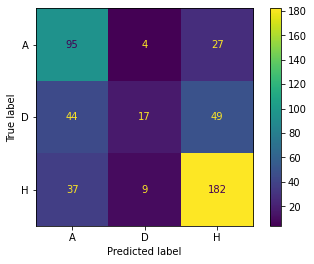

In [83]:
# Confusion Matrix

y_pred_xgb_grid_names = [class_mapping[val] for val in y_pred_xgb_grid]

cm_xgb_grid = confusion_matrix(y_test, y_pred_xgb_grid)
disp_xgb_grid= ConfusionMatrixDisplay(confusion_matrix=cm_xgb_grid, display_labels=target_names)

disp_xgb_grid.plot()